In [1]:
from pathlib import Path

In [2]:
image_shape = (224, 224) #(height, width) not (width, height)
image_save_path = Path('./saved_spectrogram.png')

In [3]:
audio_filename = '/root/bird/kitzes/20220601_053000.WAV'


In [4]:
import os

# Define the path to your file
file_path = '/root/bird/kitzes/20220601_053000.wav'

# Get the directory of the file
file_directory = os.path.dirname(file_path)

# Print the file directory
print("File directory:", file_directory)


File directory: /root/bird/kitzes


In [5]:
# import Audio and Spectrogram classes from OpenSoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram

In [6]:
audio_object = Audio.from_file(audio_filename)

In [7]:
print(f"How many samples does this audio object have? {len(audio_object.samples)}")
print(f"What is the sampling rate? {audio_object.sample_rate}")

How many samples does this audio object have? 86400000
What is the sampling rate? 48000


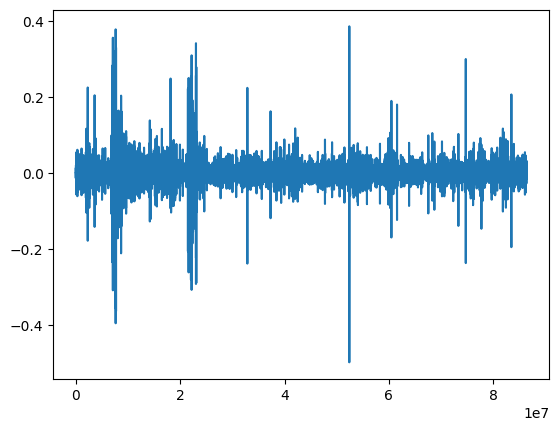

In [8]:
import matplotlib.pyplot as plt
plt.plot(audio_object.samples)
plt.show()

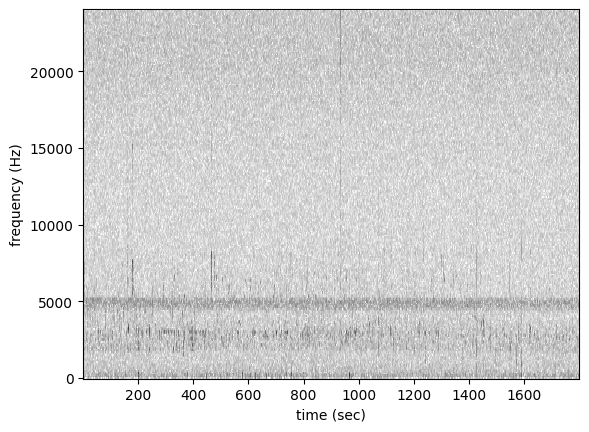

In [9]:
#spectogram plot
spectrogram_object = Spectrogram.from_audio(audio_object)
spectrogram_object.plot()

In [10]:
spectrogram_image = spectrogram_object.to_image()
image_path = Path('./saved_spectrogram.png')
spectrogram_image.save(image_path)

In [11]:
#delete the saved image
image_path.unlink()

In [12]:
# Load necessary packages
from opensoundscape.torch.models.cnn import load_model
import opensoundscape
# Other utilities and packages
import torch
from pathlib import Path
import numpy as np
import pandas as pd
from glob import glob
import subprocess

# Set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] # for large visuals
%config InlineBackend.figure_format = 'retina'

# Define and save the model
from opensoundscape.torch.models.cnn import CNN
model = CNN('resnet18', ['classA', 'classB'], 5.0)
model.save('./temp.model')

# Load the model
model = load_model('./temp.model')

# Find all WAV files in current directory
audio_files = glob('./*.WAV')

# Predict on audio files
scores = model.predict(
    audio_files,
    activation_layer='softmax',
)

print(scores)


/root/bird/kitzes/lib/python3.8/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):
/root/bird/kitzes/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/bird/kitzes/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[]
(                                             classA    classB
file                  start_time end_time                    
./20220601_053000.WAV 0.0        5.0       0.577051  0.422949
                      5.0        10.0      0.522083  0.477917
                      10.0       15.0      0.579018  0.420982
                      15.0       20.0      0.577072  0.422928
                      20.0       25.0      0.592736  0.407264
...                                             ...       ...
./20220601_073000.WAV 1775.0     1780.0    0.518071  0.481929
                      1780.0     1785.0    0.569416  0.430584
                      1785.0     1790.0    0.560067  0.439933
                      1790.0     1795.0    0.534771  0.465229
                      1795.0     1800.0    0.551485  0.448515

[1440 rows x 2 columns], None, [])
